## We have to analyze the rented bicycle data they've gathered in 2018, In order to learn the best time of day to have their maintenance teams repair bikes.The director wants the maintenance work to occur during lower traffic times, when bicycle rental numbers are minimal, but still during standard working hours (8 a.m. to 5 p.m). 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('bicycle_rental.csv')
data.head()

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
from datetime import datetime

In [5]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [6]:
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True)
data.head()

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [31]:
for col in data.columns:
    if data[col].dtype == 'O':
        print(data[col].value_counts())
        print("--------------------------")

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64
--------------------------
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64
--------------------------
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64
--------------------------
Day_Type
Weekday    6264
Weekend    2496
Name: count, dtype: int64
--------------------------


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(蚓)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(蚓)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [8]:
data.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(蚓)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(蚓)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

no null values here

In [9]:
#Bicycle data in 2018
data_2018 = data[data["Date"].dt.year == 2018]
data_2018.head()

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
744,2018-01-01,206,0,-3.2,40,0.5,1358,-14.9,0.0,0.0,0.0,Winter,Holiday,Yes
745,2018-01-01,230,1,-3.3,41,0.7,2000,-14.7,0.0,0.0,0.0,Winter,Holiday,Yes
746,2018-01-01,178,2,-3.7,42,0.9,2000,-14.7,0.0,0.0,0.0,Winter,Holiday,Yes
747,2018-01-01,119,3,-4.0,44,1.0,2000,-14.4,0.0,0.0,0.0,Winter,Holiday,Yes
748,2018-01-01,62,4,-4.2,53,1.1,1994,-12.3,0.0,0.0,0.0,Winter,Holiday,Yes


In [18]:
#Filtering only working hours in the year 2018
Working_hours = data_2018[(data_2018['Hour'] >= 9) & (data_2018['Hour'] <= 17)]

In [14]:
Working_hours

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
753,2018-01-01,121,9,-4.3,39,0.7,1973,-16.2,0.15,0.0,0.0,Winter,Holiday,Yes
754,2018-01-01,139,10,-1.6,32,0.8,1766,-16.1,0.53,0.0,0.0,Winter,Holiday,Yes
755,2018-01-01,169,11,0.1,27,2.2,1874,-16.7,0.84,0.0,0.0,Winter,Holiday,Yes
756,2018-01-01,225,12,1.5,20,2.8,1992,-19.0,1.03,0.0,0.0,Winter,Holiday,Yes
757,2018-01-01,248,13,2.4,22,2.3,1921,-17.2,1.10,0.0,0.0,Winter,Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8749,2018-11-30,740,13,7.1,24,2.8,1838,-12.1,1.83,0.0,0.0,Autumn,No Holiday,Yes
8750,2018-11-30,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,2018-11-30,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,2018-11-30,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes


C:\Users\VIPER\AppData\Local\Temp\ipykernel_10092\41811331.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x=Working_hours['Hour'], y=Working_hours['Rented Bike Count'], ci=False)


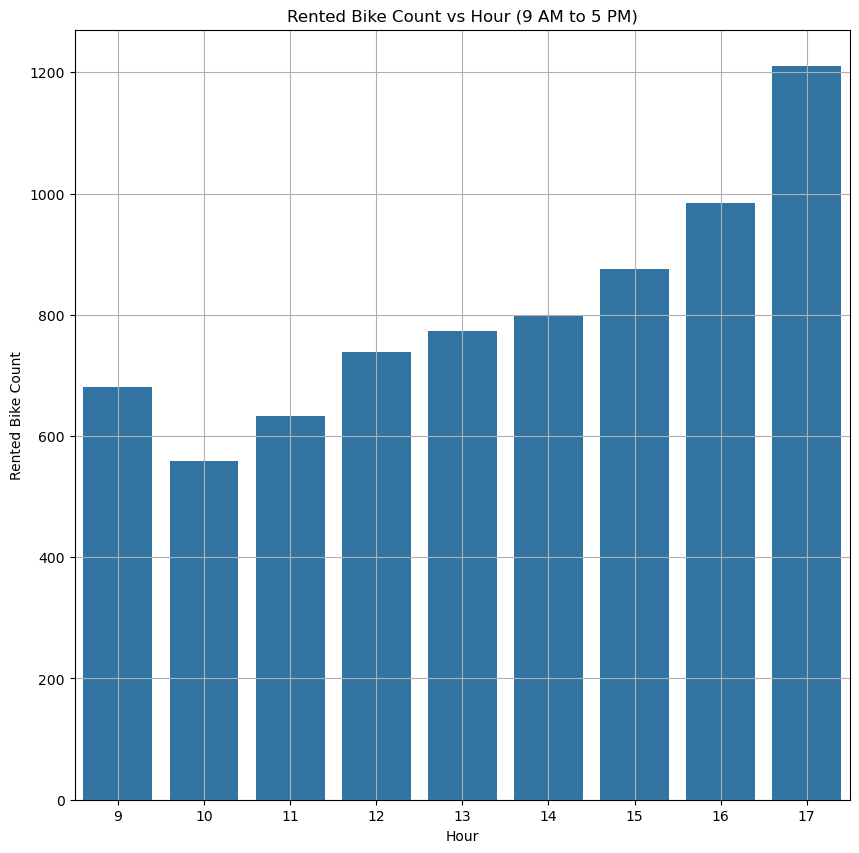

In [22]:
plt.figure(figsize=(10, 10))
sns.barplot(x=Working_hours['Hour'], y=Working_hours['Rented Bike Count'], ci=False)
plt.title('Rented Bike Count vs Hour (9 AM to 5 PM)')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

## we can see between 10 am and 2pm looks like low rental rate, we can do maintenance work between 10am and 2pm